# <center> Projet d'économétrie SIM722 <center>

<u>Devoir fait par :<u>  Rodolphe Calvet, Jean-Philippe Quach

Les points sont proportionnels à la difficulté des questions. Justifiez toutes vos réponses et étapes du raisonnement. Tous les tests sont demandés à 5% sauf si spécifié dans la question.


# Import de librarie

In [1]:
 !pip install pmdarima

In [3]:
! jupyter nbconvert --to pdf devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF.ipynb

[NbConvertApp] Converting notebook devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF.ipynb to pdf
[NbConvertApp] Support files will be in devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files\
[NbConvertApp] Making directory .\devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files
[NbConvertApp] Making directory .\devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files
[NbConvertApp] Making directory .\devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files
[NbConvertApp] Making directory .\devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files
[NbConvertApp] Making directory .\devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files
[NbConvertApp] Making directory .\devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files
[NbConvertApp] Making directory .\devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files
[NbConvertApp] Making directory .\devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files
[NbConvertApp] Making directory .\devoir_eco_Rodolphe_Calvet_JP_Quach_part2_VF_files
[NbConvertApp] Making directory .\devoir_eco_Rodol

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm # :)
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import pmdarima as pmd
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from IPython.display import Image

from scipy.stats import t
from scipy.stats import f
import warnings
warnings.filterwarnings("ignore")

# <u>Partie 2. Séries temporelles<u>

### 1. Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes)

In [3]:
df = pd.read_excel("quarterly.xls")#, usecols="CPI")
df

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187


In [4]:
print(f"Y a t-il un problème de valeur manquante ? {df.isna().any().any()}")

Y a t-il un problème de valeur manquante ? False


### 2. Stationnariser la série de CPI en utilisant la méthode de régression qui inclut un terme de tendance dont la forme fonctionnelle est à choisir (linéaire, quadratique, log, exponentielle, …)

In [5]:
serieCPI = df["CPI"]
serieCPI.describe()

count    212.000000
mean     113.182028
std       65.310267
min       29.400000
25%       43.705000
50%      109.635000
75%      167.507500
max      231.280000
Name: CPI, dtype: float64

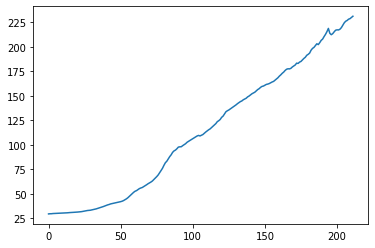

In [6]:
plt.plot(serieCPI);
#La série est notoirement non stationnaire : sa moyenne est croissante et non constante par exemple.

Ici, on peut voir qu'il y a une tendance quasi linéaire, donc on va favoriser un modèle additif (par niveau)

In [7]:
n = len(serieCPI)
const = np.ones(n) 
# Intercept X tq X -> (1,X)
X = np.column_stack((const, serieCPI.index))
y = serieCPI

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.37e-187
Time:                        00:21:32   Log-Likelihood:                -755.40
No. Observations:                 212   AIC:                             1515.
Df Residuals:                     210   BIC:                             1522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8275      1.174      1.557      0.1

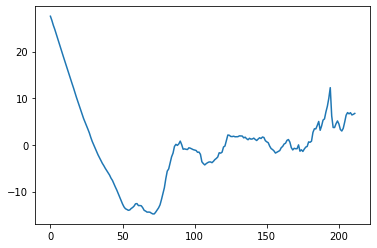

In [8]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
o1 = results.resid #https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html
plt.plot(o1);

### 3. Stationnariser la série de CPI en utilisant un moyenne mobile centrée 5x5.

Pourquoi stationariser la série CPI ?
Pour se placer dans l'hypothèse fondamentale classique d'un modèle sans spurious regression!

En effet, sans cela, la série CPI (qui inclut une tendance, c'est à dire une dépendance au temps)
serait fortement corrélée au bruit u, lui aussi dépendant du temps
On aurait alors un biais issu de cette corrélation entre variables cachée et obersvée
Sans cette stationarité, notre modèle rendrait en fait compte seulement de cette tendance commune au temps,
et donc serait sans intérêt (spurious regression)

Pas d'autre choix/outil/théorie que de STATIONNARISER selon des hypothèses qui sont :
    - le choix de la modélisation de cette tendance d'une part (forme lin, quad, etc..), 
    - et/ou l'étude/modélisation de changement de régime

On se rapporte à un modèle de la forme suivante vue en cours :   
$ Y{t} = \beta_{const} + \beta_{1t}Z_{1t} + \beta_{2t}Z_{2t} + ... + \beta_{kt}Z_{kt} + O{t} $

avec $ O{t} = T{t} + S{t} + I{t} $ par exemple avec un modèle additif (T : trend, S : season, I : résidu stationnaire)

On parle de filtre, ou de pré-filtre, T et S vue comme des "nuisances", éliminées en niveau ou en log.

Stationnariser se fait par différences premières ou par passage d'un filtre à moyenne mobile.

Filtre, moyenne mobile : 

La variable d'intérêt Xt subit une transformation, au choix, qui à pour inconvénient d'empêcher l'interprétation (puisque la nouvelle var n'est plus interprétable) mais l'avantage d'accéder à It, de stationnariser en pratique, et de pouvoir ensuite appliquer les outils propres aux séries stationnaires.
La compréhension des natures tendancielle et saisonnière du processus (des "nuisances") reste possible mais le filtrage n'apporte pas d'information là dessus.

Ici, on va favoriser l'approche statistique et son modèle additif au vue de notre tendance qui semble linéaire. On va donc calculer la moyenne mobile d'ordre 5 et et la retirer à notre modèle pour avoir un modèle sans tendance et donc en obtenant une série stationnaire.

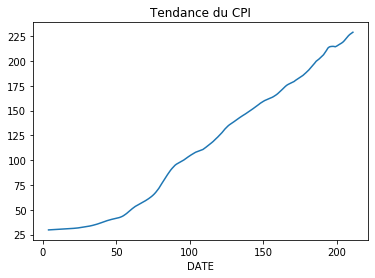

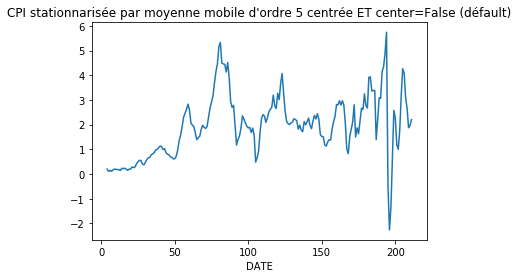

In [9]:
# Filtrage/stationnarisation par moyenne mobile

# Avec center=False, dans le tp, la moyenne centrée est fait sans le center = true

t2 = serieCPI.rolling(window=5, center=False).mean() # t car c'est la tendance qu'on va lui enlever
plt.xlabel("DATE")
plt.title("Tendance du CPI")
plt.plot(t2);
o2 = serieCPI - t2
plt.figure()
plt.plot(o2)
plt.xlabel("DATE")
plt.title("CPI stationnarisée par moyenne mobile d'ordre 5 centrée ET center=False (défault)");

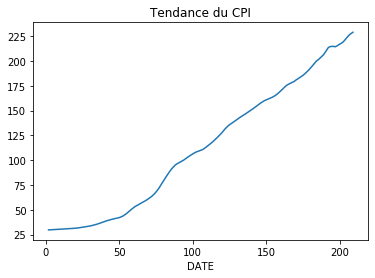

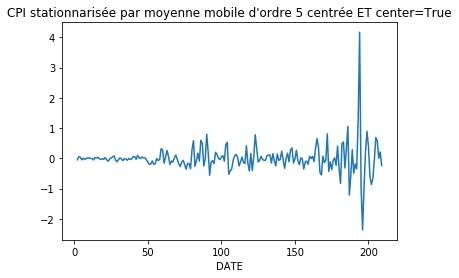

In [10]:
# Filtrage/stationnarisation par moyenne mobile

# Avec center=True

t2_centered= serieCPI.rolling(window=5, center=True).mean()
plt.plot(t2_centered);
plt.xlabel("DATE")
plt.title("Tendance du CPI")
o2_centered = serieCPI - t2_centered
plt.figure()
plt.xlabel("DATE")
plt.plot(o2_centered)
plt.title("CPI stationnarisée par moyenne mobile d'ordre 5 centrée ET center=True");

### 4. Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.

Le CPI est un indice des prix à la consommation. 
Or l'inflation est la variation de cet indice en %.  
Plus précisément le taux d'inflation c'est le $(CPI_{t} - CPI_{t-1}) / CPI_{t-1}* 100 * 4$

inf peut être vue comme la série CPI stationarisée par la méthode des différences premières

In [11]:
#inf = np.diff(serieCPI)0])
#inf = inf/serieCPI[:-1] * 100 * 4 #car on a des semestres donc le taux annuels est multiplié par 4

serieCPItmu = pd.Series.shift(df["CPI"], 1, fill_value=29.4)

inf = ( serieCPI - serieCPItmu ) / serieCPItmu *100*4

serieCPItmu, serieCPI, inf

df["inf"] = inf
df

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,inf
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830,0.000000
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,2.312925
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,0.270544
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624,2.568435
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073,0.805910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496,1.397117
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519,2.291052
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500,0.998817
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187,2.080056


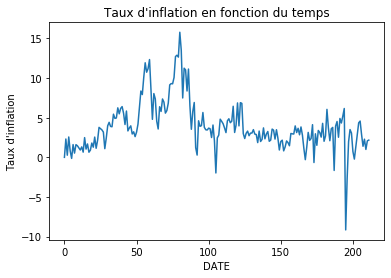

In [12]:
plt.xlabel("DATE")
plt.ylabel("Taux d'inflation")
plt.title("Taux d'inflation en fonction du temps")
plt.plot(inf);

In [13]:
infAsALit = list(inf)
print("Valeurs d'inflation négatives")
[print(f" Entrée {idx} : {thisInf}") for idx, thisInf in enumerate(infAsALit) if thisInf<0]

Valeurs d'inflation négatives
 Entrée 5 : -0.13404825737267512
 Entrée 105 : -1.9713425207629536
 Entrée 167 : -0.29274334290377857
 Entrée 173 : -0.6544145716311531
 Entrée 187 : -1.6537874686222869
 Entrée 195 : -9.156538426391334
 Entrée 196 : -2.6560673369183774
 Entrée 201 : -0.22079116835327425


[None, None, None, None, None, None, None, None]

On observe des valeurs d'inflation assez courantes (entre 0 et 2% classiquement) et aussi une irrégularité à l'entrée 194, qui correspond au début de la crise des subprimes aux US (Cf DATE 2008Q3)

In [14]:
inf[194]
df.loc[194]

DATE         2008Q3
FFR            1.94
Tbill          1.49
Tb1yr          2.12
r5             3.11
r10            3.86
PPINSA       200.47
Finished      182.7
CPI          218.86
CPICORE      107.38
M1NSA       1419.77
M2SA        23317.5
M2NSA       7738.83
Unemp             6
IndProd       95.46
RGDP        13186.9
Potent      13523.3
Deflator    109.162
Curr        832.188
inf         6.16127
Name: 194, dtype: object

### 5. Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la différence entre ces deux graphiques ?

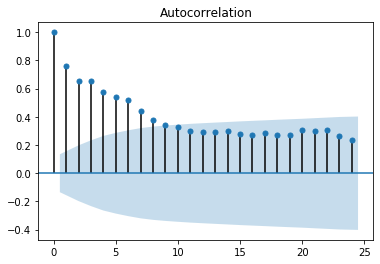

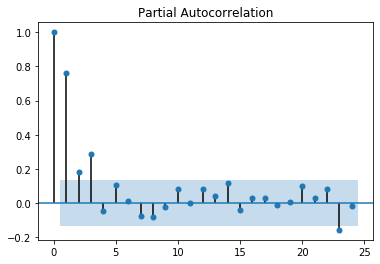

In [15]:
#acf(inf)
plot_acf(inf, alpha = 0.05)
plt.show()

#pacf(inf)
plot_pacf(inf,alpha = 0.05)
plt.show()


Ici dans notre fonction d'autocorrélation, on voit qu'au délai 1 l'inflation est corrélé avec un coefficient de 1(le signal initial lui même). Plus on avance dans le temps, moins nos données sont corrélés avec les données d'avant.
Ici au délai 2, on est moins corrélé avec les données du délai 1 et ainsi de suite. Plus on s'éloigne du délai initiale, plus le lien entre les données est faible.  
Notre question est combien de lag doit on introduire pour prédire l'inflation ?  
Notre graphe d'autocorrélation partielle nous renseigne si au délai 1, je peux prédire le futur. Ici, sur notre graphe on voit qu'à partir du délai 4, les autres délais ne semblent pas avoir d'effets signficatifs sur la taux d'inflation. La zone en bleu signifie que lorsque le coefficient de corrélation se trouve dans cette zone, elle n'est plus significatif au seuil de 5%. On se retrouve avec un processus AR(4). On va donc estimer un processus AR(4) avec ces données-ci.

### 6. Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme "spurious regression".

Ergodicité (Wiki)

"Un processus ergodique est un processus stochastique pour lequel les statistiques peuvent être approchées par l'étude d'une seule réalisation suffisamment longue."  
Ce qui signifie qu'avec cette seule réalisation crée par ce processus, on va pouvoir faire de l'inférence sur le processus qui a généré les données. 
La différence est que dans une série stationnaire, les observations dépend fortement des observations passés tandis que l'ergodique, la dépendance est moins forte et qu'il y a pas d'état absorbant pour l'ergodique.
Si on laisse le processus et qu'on a suffisament d'observation, les conditions initiales ne sont pas importantes c'est-à-dire qu'à partir d'une réalisation du processus, on va devoir faire de l'inférence sur le processus qui a génér" les réalisations. 

Si on a un processus ergodique, on va pouvoir appliquer le théorème ergodique qui dit que la moyenne empirique va coverger vers la vraie moyenne théorique du processus hyper complexe qui a généré cette seule réalisation. C'est un résultat for qui dépend d'une hypothèse forte que le monde qu'on observe est ergodique c'est-à-dire, pas de stationnarité, c'est-à-dire que les conditions initiales ne sont pas importantes.
Cependant, cela est faux car les conditions initiales vont déterminer la trajectoire qu'on observe (à partir de la data on va pouvoir dire des choses). Si on est prêt à faire ses hypothèse de stationnarité et d'ergodicité et qu'on arrive à se mettre dans les conditions de Gauss-Markov, on pourra appliquer tout ce qu'on a vu à peu de choses près avec les tests dans la partie précédente, que ce soit les tests de Student, les tests de fisher, les changements de structures etc.  
Pour être dans les conditions de Gauss Markov, il faut 2 conditions :  
-exogénéité, que les $u_t$ soient indépendants des $x_t$, mais il suffit d'avoir une exogénité contemporaine.
-hétéroscédasticité, c'est-à-dire, pas d'auto-corrélation des erreurs, pour cela on transforme les séries pour que les séries transformés soient homoscédastique par quasi différences :  
$y_t - \rho y_{t-1}$  
$X_t - \rho y_{t-1}$  où $\rho$ est le coefficient d'auto-corrélation  
(on peut calculer un estimateur des moindres carrés généralisé qui tient compte de l'hétéroscédastcité.)

Le terme spurious regression, c'est une corrélation avec entre 2 variables qui n'ont pas de rapport, qui n'ont aucun sens type : corrélation de vente de mozarrella et l'amélioration dans la science. Car ils ne prennent pas en compte le terme de tendance, il n'y a donc pas de modélisation du terme de tendance



### 7. Faire le test Augmented Dickey Fuller pour inf en utilisant le critère AIC pour déterminer le nombre de lags à inclure. Commenter

AIC avec hypothèses de stationarité (inf issue de CPI detrendée, ici pas de changement de régime modélisé
pour le moment, bien qu'on ait déjà remarqué celui dû aux subprimes), ergodicité, homoscédasticité.
Donc Gauss Markov vérifié.
On récupère les paramètres optimaux correspondant au modèle le plus proche du processus,
au sens de la métrique AIC (approche GridSearch ML en quelque sorte)

!! La cellule ci dessous donnent des résultats sans constante ni tendance (regression='nc') !!


In [16]:
# !!!! pas de constante, pas de tendance : regression='nc'

adf_inf_AIC = adfuller(inf, regression='nc', autolag='AIC')

print(f"stats de Dickey-Fuller :{adf_inf_AIC[0]}")
print(f"p valeure :{adf_inf_AIC[1]}")
print(f"Nombre de degré de liberté : {adf_inf_AIC[3]}")
print (f"Le nombre de LAGS qui minimise le critère AIC est :  {adf_inf_AIC[2]}" ) # Cela corréle avec notre Autocorrélogramme partiels
print(f"Avec CE modèle ADF d'ordre {adf_inf_AIC[2]} on trouve que :")
print (f"La valeur critique à 5% est :  {adf_inf_AIC[4]['5%']}" )
print (f"Or la stat DF de notre modèle vaut :  {adf_inf_AIC[0]}" )

# Or..
# La spec du test de Dickey Fuller stipule que l'hypothèse est REJETEE si la stat est INF à la val critique tab
marge = adf_inf_AIC[0] - adf_inf_AIC[4]['5%'] 


if marge > 0 :
    print(f"Donc on ne rejète pas Ho : ") # On accepte jamais l'hypothèse H0
    print ("il existe une racine unitaire dans le modèle et donc on va favoriser une approche par différence premières")
else:
    print(f"Donc on rejète Ho : pas de racine unitaire dans le modèle") 
    print (".. et donc approche filtre possible par ailleurs")


stats de Dickey-Fuller :-1.42577860278205
p valeure :0.1435806870589662
Nombre de degré de liberté : 207
Le nombre de LAGS qui minimise le critère AIC est :  4
Avec CE modèle ADF d'ordre 4 on trouve que :
La valeur critique à 5% est :  -1.9423725959590938
Or la stat DF de notre modèle vaut :  -1.42577860278205
Donc on ne rejète pas Ho : 
il existe une racine unitaire dans le modèle et donc on va favoriser une approche par différence premières


### 8. Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.

Nous avons donc stationarisé CPI
Prenons le résultat précédent qui propose un LAG de 4

In [17]:
# Avec trend : str {‘c’,’nc’} :  Whether to include a constant or not. ‘c’ includes constant, ‘nc’ no constant.
# cf
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.fit.html

# Avec le max lag de la question précédente, on obtient le modèle d'ordre correspondant, dont les paramètres
# sont explicités ici :
mdl = smt.AR(inf).fit(maxlag=adf_inf_AIC[2], trend='nc')
mdl.params

L1.CPI    0.628262
L2.CPI    0.000366
L3.CPI    0.350326
L4.CPI   -0.025946
dtype: float64

In [18]:
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [19]:
arima_model = arimamodel(inf)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=888.775, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=922.758, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=908.295, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=890.903, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=920.763, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=884.983, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=883.178, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=885.147, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=881.596, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=883.503, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=881.116, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=883.577, Time=0.08 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=884.191, Time=0.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=883.090, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=883.2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -433.566
Date:                Mon, 17 May 2021   AIC                            879.133
Time:                        00:21:38   BIC                            899.244
Sample:                             0   HQIC                           887.262
                                - 212                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1181      0.252      0.468      0.640      -0.376       0.612
ar.L2          0.1705      0.180      0.949      0.343      -0.182       0.523
ar.L3          0.2852      0.056      5.123      0.000       0.176       0.394
ma.L1         -0.5021      0.275     -1.826      0.068      -1.041       0.037
ma.L2         -0.3927      0.243     -1.615      0.106      -0.869       0.084
sigma2         3.5559      0.143     24.834      0.000       3.275       3.837
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2051.17
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.64   Skew:                            -2.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

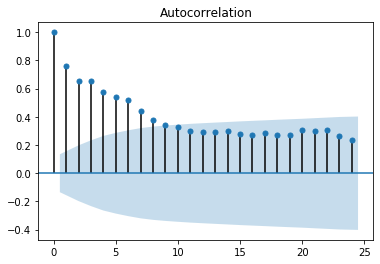

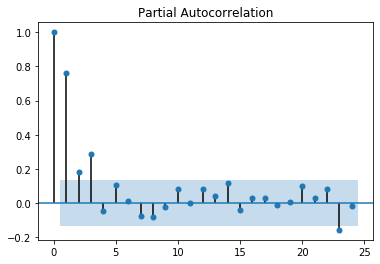

In [20]:
#acf(inf)
plot_acf(inf, alpha = 0.05)
plt.show()

#pacf(inf)
plot_pacf(inf,alpha = 0.05)
plt.show()

D'après le modèle ARIMA, le paramètre p minimisant au mieux l'AIC est p = 3, ceci coincide avec nos autocorrélogramme et autocorrélogramme partielle qui atteste qu'à partir du 4e lag, les coefficients ne sont plus significatifs au vue de leur présence dans la zone bleu qui représente le seuil à 5% de significativité.

### 9. Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.

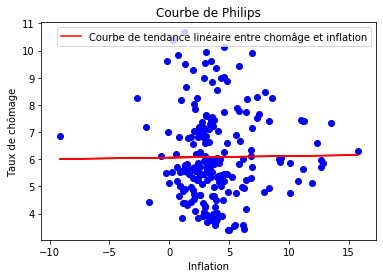

Paramètres du modèle : 
Coefficient de la pente est de [0.00579407]
l'intercept est de 6.059253507046363


In [21]:
unemployment = df['Unemp']
X = np.array(inf).reshape(-1, 1)
y =  unemployment #[1:]

# Régression pour avoir le coefficient et l'intercept
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
coef = model.coef_
intercept = model.intercept_

# plot du graphique
plt.plot(X,  coef*X + intercept, color='r', label = "Courbe de tendance linéaire entre chomâge et inflation")
plt.scatter(inf, unemployment, color = 'blue')
plt.xlabel("Inflation")
plt.ylabel("Taux de chômage")
plt.title("Courbe de Philips")
plt.legend()
plt.show()

print("Paramètres du modèle : ")
print(f"Coefficient de la pente est de {coef}")
print(f"l'intercept est de {intercept}")

In [22]:
s = df.shape[0] 
const=np.ones(s)
y = df["Unemp"] # quand tu fais np.diff l'output qui en ressort c'est celui-ci out[i] = a[i+1] - a[i]
X = np.column_stack((const, inf)) # Tu n'as donc pas la dernière valeur alors tu supprimmes la dernière valeure de Y
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())
u=results.resid

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02604
Date:                Mon, 17 May 2021   Prob (F-statistic):              0.872
Time:                        00:21:39   Log-Likelihood:                -401.84
No. Observations:                 212   AIC:                             807.7
Df Residuals:                     210   BIC:                             814.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0593      0.179     33.774      0.0

Au vue de notre p-value à 87.2%, à 5 % nous ne rejettons pas $H_0$ ce qui signifie que le coefficient n'est pas significatif par rapport au taux de chômage

### 10. Tester l’autocorrélation des erreurs.

In [23]:
n = len(u)
u_1 = u[0:n-1]
const2 = np.ones(n-1)
X=np.column_stack((const2, u_1))
X=X[:,1]
y=u[1:n]
model2=sm.OLS(y, X)
results2 = model2.fit()
print(results2.summary())

# cf jeffrey's book :
# This regression may or may not
# contain an intercept; the t statistic for r ˆ will be slightly affected, but it is asymptotically
# valid either way.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4564.
Date:                Mon, 17 May 2021   Prob (F-statistic):                   1.99e-144
Time:                        00:21:39   Log-Likelihood:                         -70.709
No. Observations:                 211   AIC:                                      143.4
Df Residuals:                     210   BIC:                                      146.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Le modèle confirme avec une p-value à 0% ce qui signifie que le coefficient est significatif et comme le coefficient est pratiquement de 1 on peut dire qu'il y a autocorrélation postivie des erreurs, ce qui nécessite les traitements suivants de "correction".

### 11. Corriger l’autocorrélation des erreurs par la méthode vue en cours.

Pour traiter l'autocorrélation on va partir de ces 2 équations :  
$y_{t-1} = \beta_0 + \beta_1 X_{t-1} + u_{t-1}$  
$y_t = \beta_0 + \beta_1 X_t + u_t$  

Puis en faisant la différence entre les 2 modèles, on obtient :  
$y_t - \rho y_{t-1} = (1 - \rho)\beta_0 + \beta1(X_t - \rho X_{t-1}) + e_t, t\geq 2$,  
On obtient donc :  
$\tilde{y_t} = (1 - \rho)\beta_0 + \beta_1 \tilde{X_t} + e_t, t\geq 2$  

où $\tilde{y_t} = y_t - \rho y_{t-1}$ et $\tilde{X_t} = X_t - \rho X_{t-1} $

In [24]:
n = len(u)
rho = results2.params[0]
const = np.ones(n-1)
y_tilde = df["Unemp"][1:n].values - rho*df["Unemp"][0:n-1].values
X_tilde = np.column_stack((const, inf[1:n] )) - rho*np.column_stack((const, inf[0:n-1]))
model3=sm.OLS(y_tilde,X_tilde)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     5.129
Date:                Mon, 17 May 2021   Prob (F-statistic):             0.0246
Time:                        00:21:39   Log-Likelihood:                -66.683
No. Observations:                 211   AIC:                             137.4
Df Residuals:                     209   BIC:                             144.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8148      1.135      6.006      0.0

In [25]:
print(f"x1 de cette reg FGLS donne directement BETA1 recherché : {results3.params[1]}")
print(f"la const de cette reg FGLS donne (1-roHat)BETA0 :{results3.params[0]}")
print(f"et donc BETA0 vaut : {results3.params[0] / (1 - rho)}")

x1 de cette reg FGLS donne directement BETA1 recherché : -0.024602670360886342
la const de cette reg FGLS donne (1-roHat)BETA0 :6.814806818754986
et donc BETA0 vaut : 336.51966686002226


### 12. Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

2 méthodes s'imposent à nous :  
- soit on connait la période du changement de régime et on va effectuer le test de Chow et introduire des variables binaires selon qu'on est avant ou après la période $\tau$ et calculer une statistique de Fisher avec un modèle contraint et non contraint. Ici notre valeur $\tau$ correspondra à $T/2$ où T est la dernière réalisation car on doit testes la stabilité de la relation chômage-inflation sur deux sous périodes de $\underline{taille identique}$
- soit on ne connait pas la période tau, alors on fera un trimming et un max des différentes statistiques de Fisher qu'on a obtenu.

=> Ici comme on doit couper nos deux sous-périodes de taille identique, on va alors utilisé le test de CHOW.

In [26]:
# Modèle contraint
u3=results3.resid
SSRr=u3.T@u3

In [27]:
t_demi = int(len(X_tilde)/2)

#P1
model4=sm.OLS(y_tilde[0:t_demi],X_tilde[0:t_demi])
results4 = model4.fit()
u4=results4.resid
SSRur1=u4.T@u4

#P2
model=sm.OLS(y_tilde[t_demi:],X_tilde[t_demi:])
results5 = model.fit()
u5=results5.resid
SSRur2=u5.T@u5


n=len(y_tilde)
F=((SSRr-(SSRur1+SSRur2))/(SSRur1+SSRur2))*(n-4)/2 # n-2*(k+1)/k+1 car on teste 2 variables binaires
print("Stats de Fisher", F)
print("p value", f.sf(F,2,n-4))

if f.sf(F,2,n-4) > 0.05 :
    print("Non rejet de H0 => Il y a stabilité donc pas de changements de régimes")
else :
    print("Rejet de H0 => Il y a donc changement de régime")

Stats de Fisher 4.231581474542131
p value 0.01580600288248177
Rejet de H0 => Il y a donc changement de régime


### 13. Faites les tests de changement de structure de Chow et détecter le point de rupture.

In [28]:
# SSR modèle non contraint :
u3=results3.resid
SSRr=u3.T@u3

a=int(len(y_tilde)*0.15)
b=int(len(y_tilde)*0.85)
sol=[]
for i in range(a,b):
    
    model6=sm.OLS(y_tilde[:i],X_tilde[:i])
    results6 = model6.fit()
    u6=results6.resid
    SSRur1=u6.T@u6;SSRur1
    
    model7=sm.OLS(y_tilde[i:],X_tilde[i:])
    results7 = model7.fit()
    u7=results7.resid
    SSRur2=u7.T@u7;SSRur2
    
    F=((SSRr-(SSRur1+SSRur2))/(SSRur1+SSRur2))*(n-4)/2 # n-2(k+1)/k+1
    sol.append(F)
sol=np.array(sol)
print(f"Statistique de QLR : {np.max(sol)}")
if np.max(sol) > 7.78 :
    print('Le seuil critique à 2 ddl est de 7.78')
    print(f"Notre test QLR est significatif à 1 %, je rejète l'hypothèse H0 à 1 %, il y a donc changement de strucutre")
else :
    print('Le seuil critique à 2 ddl est de 7.78')
    print(f"Notre test QLR n'est pas significatif à 1 %,je ne rejète pas l'hypothèse H0 à 1 %, il n'y a donc pas de changement de strucutre")

Statistique de QLR : 6.086947654491056
Le seuil critique à 2 ddl est de 7.78
Notre test QLR n'est pas significatif à 1 %,je ne rejète pas l'hypothèse H0 à 1 %, il n'y a donc pas de changement de strucutre


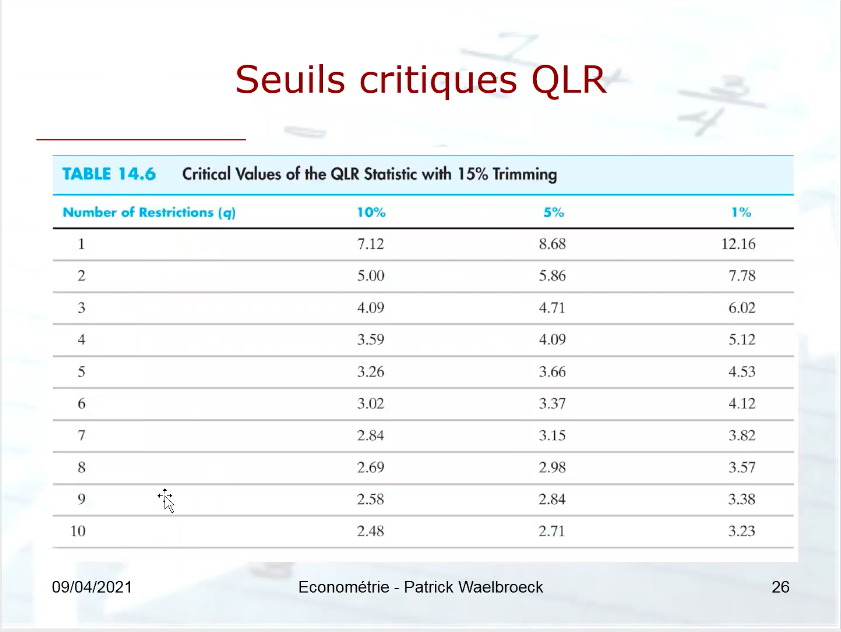

In [29]:
Image(filename='seuils_critiques_QLR.png',width=700, height=700)

In [30]:
print(f"Le changement de régime se situe en :")
print(df.loc[np.argmax(sol)+int(len(y_tilde)*0.15)]["DATE"])

Le changement de régime se situe en :
1982Q4


In [31]:
df.loc[60]

DATE         1975Q1
FFR             6.3
Tbill          5.75
Tb1yr          6.31
r5             7.27
r10            7.54
PPINSA        57.17
Finished      56.63
CPI           52.57
CPICORE       31.44
M1NSA        273.77
M2SA         2745.4
M2NSA         913.7
Unemp          8.27
IndProd       40.57
RGDP         4791.2
Potent       5037.8
Deflator     32.757
Curr         77.564
inf         8.54867
Name: 60, dtype: object

On parle de « premier choc pétrolier » pour identifier l'augmentation massive du prix du pétrole due en particulier au fait que les États-Unis ont passé leur pic de production en 1971, cela suivi de l'abandon de Bretton Woods et d'une évaluation du dollar ajoutant à la pression haussière sur le baril (qui provoquera par ricochet l'instabilité monétaire des années 1975-1985) alors que l'embargo arabe lié à la guerre du Kippour d'octobre 1973 jugule l'importation de brut. 

### 14. Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

On se rapporte à un modèle de la forme suivante vue en cours :   
$ Unemp{t} = \beta_{const} + \beta_{1t}inf_{1t} + \beta_{2t}inf_{2t} + \beta_{3t}inf_{3t} + \beta_{4t}inf_{4t} + \gamma_{1t}Unemp_{1t}+ \gamma_{2t}Unemp_{2t}+ \gamma_{3t}Unemp_{3t} + \gamma_{4t}Unemp_{4t} $


In [32]:
df["inf"]=df.CPI-pd.Series.shift(df.CPI, fill_value=0)
df["inf"][0]=0
df["inf1"]=pd.Series.shift(df.inf, fill_value=0)
df["inf2"]=pd.Series.shift(df.inf1, fill_value=0)
df["inf3"]=pd.Series.shift(df.inf2, fill_value=0)
df["inf4"]=pd.Series.shift(df.inf3, fill_value=0)

df["Unemp1"]=pd.Series.shift(df.Unemp).bfill()
df["Unemp2"]=pd.Series.shift(df.Unemp1).bfill()
df["Unemp3"]=pd.Series.shift(df.Unemp2).bfill()
df["Unemp4"]=pd.Series.shift(df.Unemp3).bfill()

df

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,...,Curr,inf,inf1,inf2,inf3,inf4,Unemp1,Unemp2,Unemp3,Unemp4
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,...,31.830,0.00,0.00,0.00,0.00,0.00,5.13,5.13,5.13,5.13
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,...,31.862,0.17,0.00,0.00,0.00,0.00,5.13,5.13,5.13,5.13
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,...,32.217,0.02,0.17,0.00,0.00,0.00,5.23,5.13,5.13,5.13
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,...,32.624,0.19,0.02,0.17,0.00,0.00,5.53,5.23,5.13,5.13
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,...,32.073,0.06,0.19,0.02,0.17,0.00,6.27,5.53,5.23,5.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,...,1055.496,0.79,1.61,2.54,2.39,1.63,9.00,9.03,9.00,9.53
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,...,1082.519,1.30,0.79,1.61,2.54,2.39,8.67,9.00,9.03,9.00
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,...,1104.500,0.57,1.30,0.79,1.61,2.54,8.27,8.67,9.00,9.03
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,...,1119.187,1.19,0.57,1.30,0.79,1.61,8.17,8.27,8.67,9.00


In [33]:
#Modèle non contraint
s = df.shape[0] 
const=np.ones(s)
y_nc = df["Unemp"]
X_nc = np.column_stack((const, df.inf1, df.inf2,df.inf3,df.inf4,df.Unemp1,df.Unemp2,df.Unemp3,df.Unemp4 ))

model8=sm.OLS(y_nc,X_nc)
results8 = model8.fit()
print(results8.summary())
u8=results8.resid

SSRu8=u8.T@u8 # Somme des carrés des erreurs

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1135.
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.57e-164
Time:                        00:21:39   Log-Likelihood:                 3.3157
No. Observations:                 212   AIC:                             11.37
Df Residuals:                     203   BIC:                             41.58
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1881      0.070      2.669      0.0

In [34]:
# Modèle contraint : il est demandé dans la question de retirer l'inflation courante,
# or c'était la seule variable non constante. Il ne reste donc que la constante 
s = df.shape[0] 
const=np.ones(s)
y_c = df["Unemp"]
#X = np.column_stack((const))#, df.inf1))#, df.inf2,df.inf3,df.inf4,df.Unemp1,df.Unemp2,df.Unemp3,df.Unemp4 ))
X_c = np.column_stack((const,df.Unemp1,df.Unemp2,df.Unemp3,df.Unemp4 ))
model9=sm.OLS(y_c,X_c)
results9 = model9.fit()
print(results9.summary())
c9=results9.resid

SSRc9=c9.T@c9 # Somme des carrés des erreurs

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2174.
Date:                Mon, 17 May 2021   Prob (F-statistic):          8.69e-168
Time:                        00:21:39   Log-Likelihood:                -3.1514
No. Observations:                 212   AIC:                             16.30
Df Residuals:                     207   BIC:                             33.09
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2246      0.071      3.179      0.0

A 5% les coefficients associés à $\tilde{X_3}$, $\tilde{X_4}$ (ordre 3 et 4) ne sont pas significatifs, donc non rejet de $H_0$ 

#### Test de Granger :

In [35]:
# 4 contraintes 
q = 4
n,k=np.shape(X_nc) 
F=((SSRc9-SSRu8)/q)/(SSRu8/(n-k)) 
p_val = f.sf(F,q,n-k) 
print("F :",F) 
print("p_val :",p_val) 
if p_val > 0.05 :
    print("Non rejet de H0 => Il y a donc non causalité de l'inflation sur le chômage")
else :
    print("Rejet de H0 => Il y a donc causalité de l'inflation sur le chômage")

F : 3.192699771904908
p_val : 0.014326923897171323
Rejet de H0 => Il y a donc causalité de l'inflation sur le chômage


<u> Cette partie n'est pas bonne mais je trouve une non causalité de l'inflation sur le chômage : <u>

In [36]:
n=len(y_tilde)
y10=y_tilde[4:n]
X_tilde1=X_tilde[3:n-1,1]
X_tilde2=X_tilde[2:n-2,1]
X_tilde3=X_tilde[1:n-3,1]
X_tilde4=X_tilde[0:n-4,1]
const=np.ones(n-4)
X10=np.column_stack((const, X_tilde1,X_tilde2,X_tilde3,X_tilde4))

model10=sm.OLS(y10,X10) 
results10 = model10.fit() 
print(results10.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.348
Date:                Mon, 17 May 2021   Prob (F-statistic):              0.253
Time:                        00:21:39   Log-Likelihood:                -63.312
No. Observations:                 207   AIC:                             136.6
Df Residuals:                     202   BIC:                             153.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1315      0.023      5.648      0.0

In [37]:
u10=results10.resid 
SSR_nc=u10.T@u10 

# modèle contraint 
X_c=np.column_stack((const)) 
model11=sm.OLS(y10,X_c[0]) 
results11 = model11.fit() 
u11=results11.resid 
SSR_c=u11.T@u11 
q = 4 

# 2 contraintes 
n,k=np.shape(X_nc) 
F=((SSR_c-SSR_nc)/q)/(SSR_nc/(n-k)) 
p_val = f.sf(F,q,n-k) 
print("F :",F) 
print("p_val :",p_val) 
if p_val > 0.05 :
    print("Non rejet de H0 => Il y a donc non causalité de l'inflation sur le chômage")
else :
    print("Rejet de H0 => Il y a donc causalité de l'inflation sur le chômage")

F : 1.3548827182365395
p_val : 0.2509672735814278
Non rejet de H0 => Il y a donc non causalité de l'inflation sur le chômage


### 15. Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.

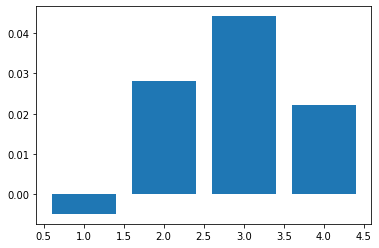

In [38]:
# Délai : valeurs des coeff correspondants aux 4  inf laggés

delai_inf = (results8.params[1], results8.params[2], results8.params[3], results8.params[4])
xx = (1,2, 3, 4)
plt.bar(xx, delai_inf);

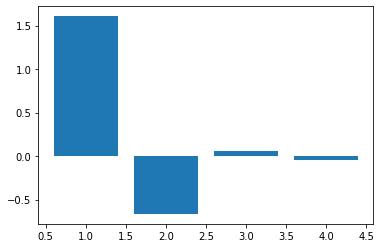

In [39]:
# Délai : valeurs des coeff correspondants aux 4  Unemp laggés

delai_unemp = (results8.params[5], results8.params[6], results8.params[7], results8.params[8])
xx = (1,2, 3, 4)
plt.bar(xx, delai_unemp);

In [40]:
LRP = results8.params[1] + results8.params[2] + results8.params[3] + results8.params[4]
LRP

0.08983487048579952

On peut dire qu'il n'y a pas trop d'effet sur le long terme de l'inflation sur le chômage.